In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime, timedelta
plt.rc('font', family='Heiti TC')

## 資料讀入與初步整理

In [2]:
POS = pd.read_csv('POS_DB.csv')
Material = pd.read_csv('Material_DB.csv')

In [3]:
Material.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5444 entries, 0 to 5443
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Material_Order_ID  5444 non-null   object 
 1   Delivery_Date      5444 non-null   object 
 2   Order_Date         5444 non-null   object 
 3   Order_Number       5444 non-null   float64
 4   Material           5444 non-null   object 
 5   Restaurant         5444 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 255.3+ KB


In [4]:
POS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4637055 entries, 0 to 4637054
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Order_ID    int64  
 1   Date        object 
 2   Meal        object 
 3   Units       int64  
 4   Restaurant  int64  
 5   Sales       float64
dtypes: float64(1), int64(3), object(2)
memory usage: 212.3+ MB


In [5]:
# Convert the 'Date' column to datetime type
POS['Date'] = pd.to_datetime(POS['Date'])

# Extract year and month from the 'Date' column
POS['Year'] = POS['Date'].dt.year
POS['Month'] = POS['Date'].dt.month

In [6]:
meal_costs_data = {
    '菜名': ['鴨肉麵線湯', '鴨肉炒飯', '鴨肉香草烤', '鴨肉湯', '鴨肉麻辣燴豆腐'],
    'Meal':['A001', 'A002', 'A003', 'A004', 'A005'],
    'Cost': [40, 40, 90, 15, 100]
}
meal_costs_df = pd.DataFrame(meal_costs_data)

In [7]:
# 合併 POS 與成本資料
merge_cost_POS = POS.merge(meal_costs_df, on='Meal')

# 計算總成本與獲利
merge_cost_POS['Total_Cost'] = merge_cost_POS['Cost'] * merge_cost_POS['Units']
merge_cost_POS['Profit'] = merge_cost_POS['Sales'] - merge_cost_POS['Total_Cost']

## 議題一：分店是否惡意降價影響獲利

In [16]:
# 計算各月各店的總成本與獲利
grouped_sum_POS = merge_cost_POS.groupby(['Year', 'Month', 'Restaurant']).agg({'Sales':'sum', 'Profit':'sum'}).reset_index().rename(columns={'Sales': 'sumSales', 'Profit': 'sumProfit'})
print(grouped_sum_POS)

     Year  Month  Restaurant   sumSales  sumProfit
0    1995      1           1  1520311.0   839841.0
1    1995      1           2  2855524.0  1829779.0
2    1995      1           3  4074082.0  2591987.0
3    1995      1           4  4150259.0  3084649.0
4    1995      1           5  1511829.0   966144.0
..    ...    ...         ...        ...        ...
715  2000     12           6  3217809.0  2442169.0
716  2000     12           7  3072723.0  2173053.0
717  2000     12           8  3140334.0  2544559.0
718  2000     12           9  1020993.0   332783.0
719  2000     12          10  1931571.0   416106.0

[720 rows x 5 columns]


### 觀察總獲利趨勢

     Restaurant  sumProfit Year-Month
0             1   839841.0     1995-1
1             2  1829779.0     1995-1
2             3  2591987.0     1995-1
3             4  3084649.0     1995-1
4             5   966144.0     1995-1
..          ...        ...        ...
715           6  2442169.0    2000-12
716           7  2173053.0    2000-12
717           8  2544559.0    2000-12
718           9   332783.0    2000-12
719          10   416106.0    2000-12

[720 rows x 3 columns]


/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seabo

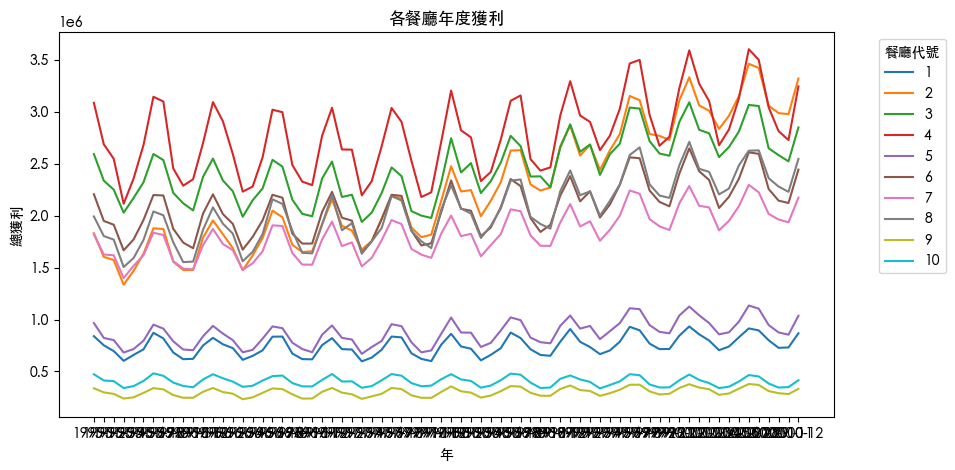

In [20]:
group_year_POS['Year-Month'] = group_year_POS['Year'].astype(str) + '-' + group_year_POS['Month'].astype(str)
Line_plot_YearMonth = group_year_POS.drop(['Year', 'Month'], axis=1)
print(Line_plot_YearMonth) 

# 繪製折線圖觀察趨勢
plt.figure(figsize=(10, 5))
sns.lineplot(data=Line_plot_YearMonth, x='Year-Month', y='sumProfit', hue='Restaurant', palette="tab10")
plt.legend(title='餐廳代號', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('年')
plt.ylabel('總獲利')
plt.title('各餐廳年度獲利')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seabo

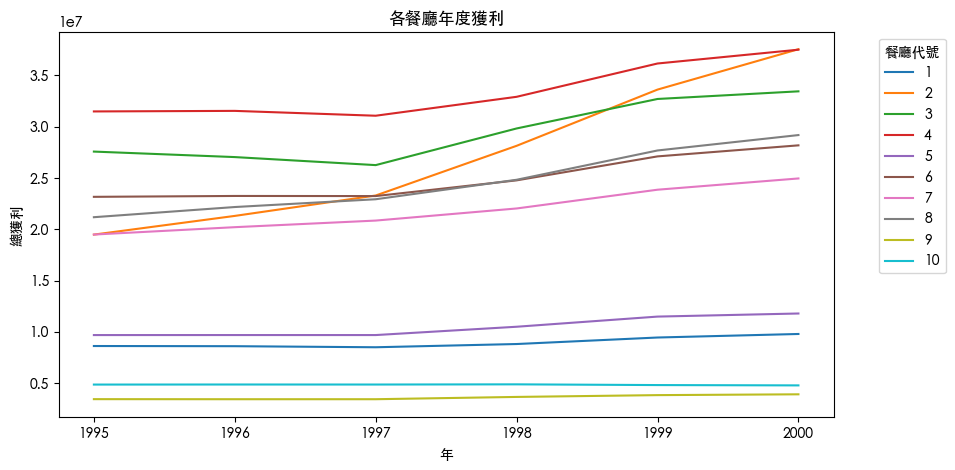

In [21]:
# 計算各店每年的平均總獲利
group_year_POS = grouped_sum_POS.groupby(['Year', 'Restaurant']).agg({'sumProfit':'sum'}).reset_index()

# 繪製折線圖觀察趨勢
plt.figure(figsize=(10, 5))
sns.lineplot(data=group_year_POS, x='Year', y='sumProfit', hue='Restaurant', palette="tab10")
plt.legend(title='餐廳代號', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('年')
plt.ylabel('總獲利')
plt.title('各餐廳年度獲利')
plt.show()

In [25]:
group_year_POS.head()

,Year,Restaurant,sumProfit
0,1995,1,8626346.0
1,1995,2,19486592.0
2,1995,3,27579267.0
3,1995,4,31492163.0
4,1995,5,9693457.0


/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seabo

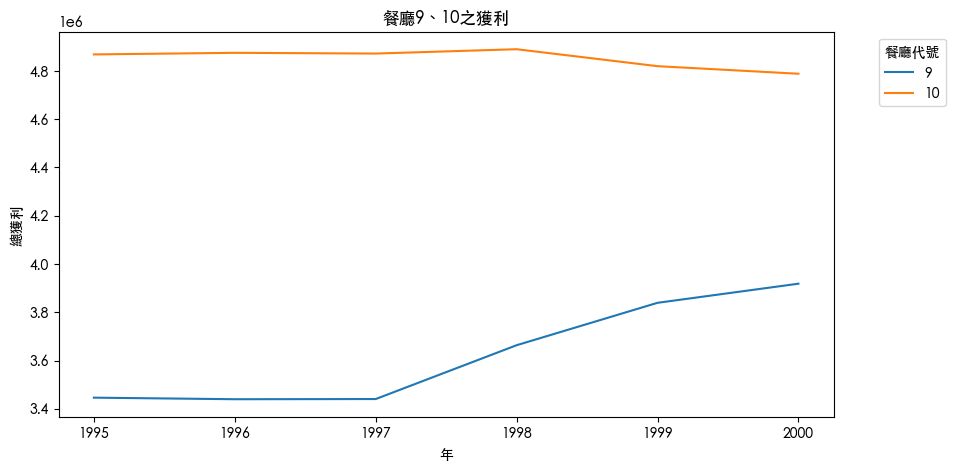

In [28]:
# 繪製折線圖觀察趨勢
plt.figure(figsize=(10, 5))
sns.lineplot(data=group_year_POS.loc[group_year_POS["Restaurant"] >= 9], x='Year', y='sumProfit', hue='Restaurant', palette="tab10")
plt.legend(title='餐廳代號', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('年')
plt.ylabel('總獲利')
plt.title('餐廳9、10之獲利')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seabo

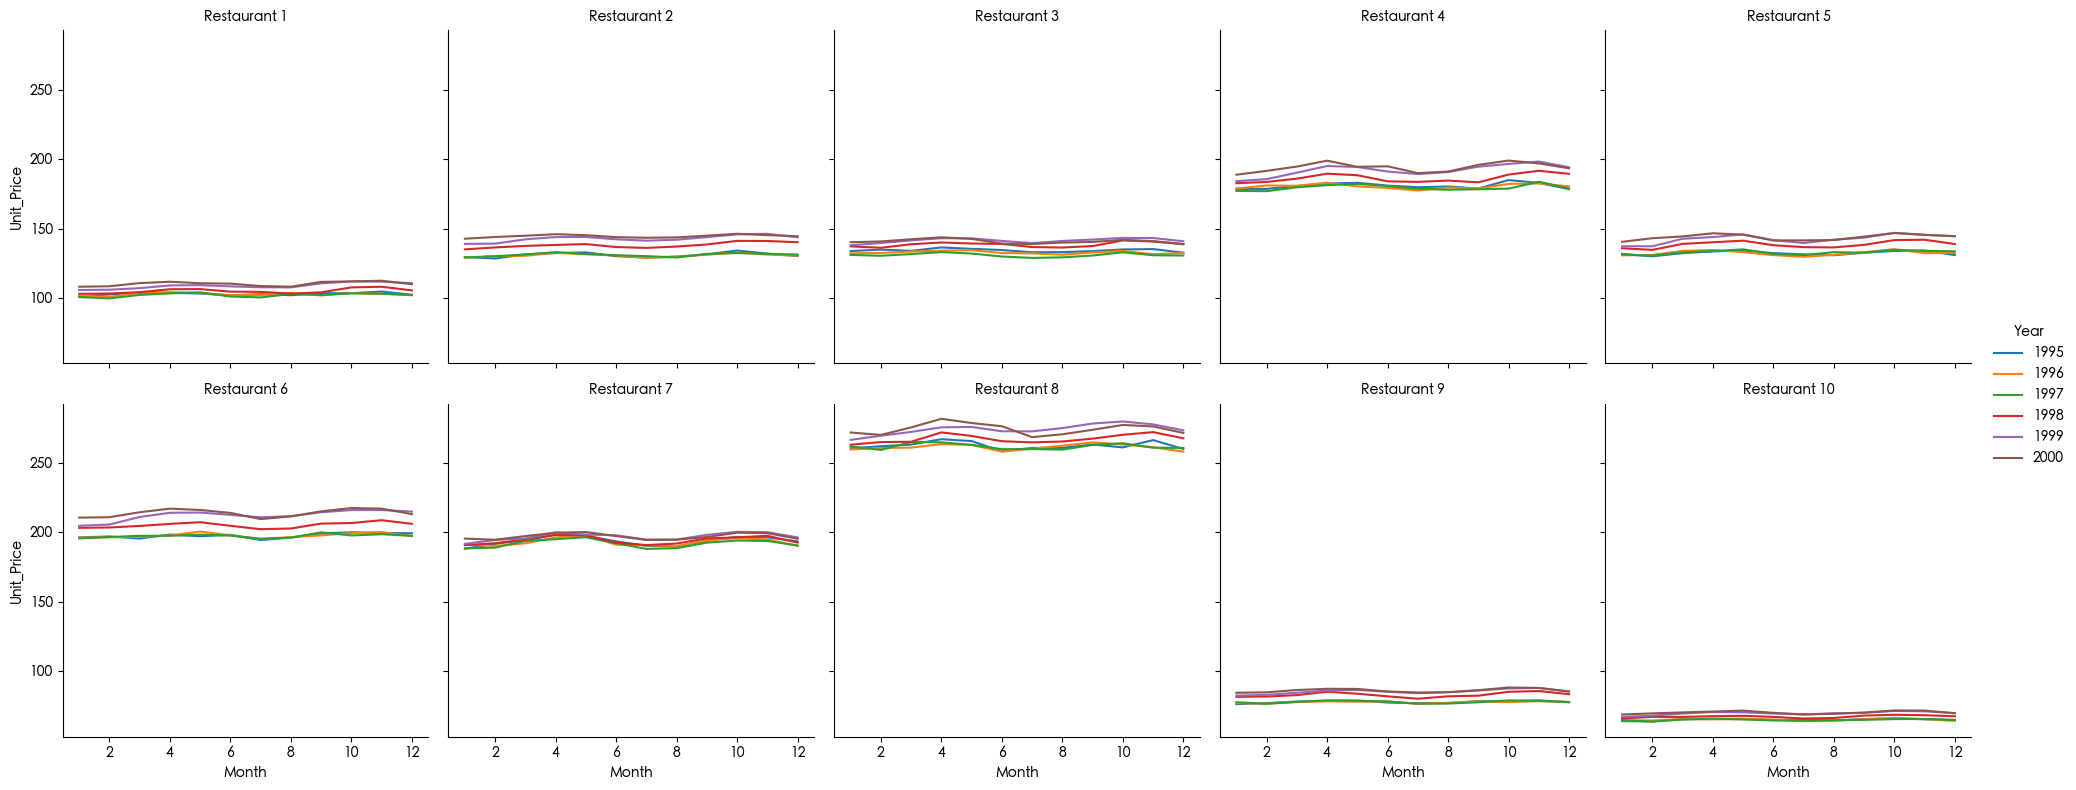

In [34]:
# 計算每個店每個月的平均銷售價格
merge_cost_POS['Unit_Price'] = merge_cost_POS['Sales'] / merge_cost_POS['Units']
Restaurant_monthly_avg_price = merge_cost_POS.groupby(['Year', 'Month', 'Restaurant']).agg({'Unit_Price': 'mean'}).reset_index()

# 繪製每個店每個月的平均銷售價格
g = sns.FacetGrid(Restaurant_monthly_avg_price, col="Restaurant", col_wrap=5, height=4)
g.map_dataframe(sns.lineplot, x='Month', y='Unit_Price', hue='Year', palette='tab10')
g.set_titles("Restaurant {col_name}")
g.add_legend(title='Year')
plt.show()

## 議題二：新品 (A005) 不受市場青睞？

In [10]:
merge_cost_POS.head()

,Order_ID,Date,Meal,Units,Restaurant,Sales,Year,Month,菜名,Cost,Total_Cost,Profit
0,199501010000000001,1995-01-01,A001,4,1,346.0,1995,1,鴨肉麵線湯,40,160,186.0
1,199501010000000075,1995-01-01,A001,4,10,216.0,1995,1,鴨肉麵線湯,40,160,56.0
2,199501010000000076,1995-01-01,A001,2,10,120.0,1995,1,鴨肉麵線湯,40,80,40.0
3,199501010000000077,1995-01-01,A001,1,10,60.0,1995,1,鴨肉麵線湯,40,40,20.0
4,199501010000000079,1995-01-01,A001,2,10,120.0,1995,1,鴨肉麵線湯,40,80,40.0


### 繪圖觀察新品隨時間之獲利狀況

/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/se

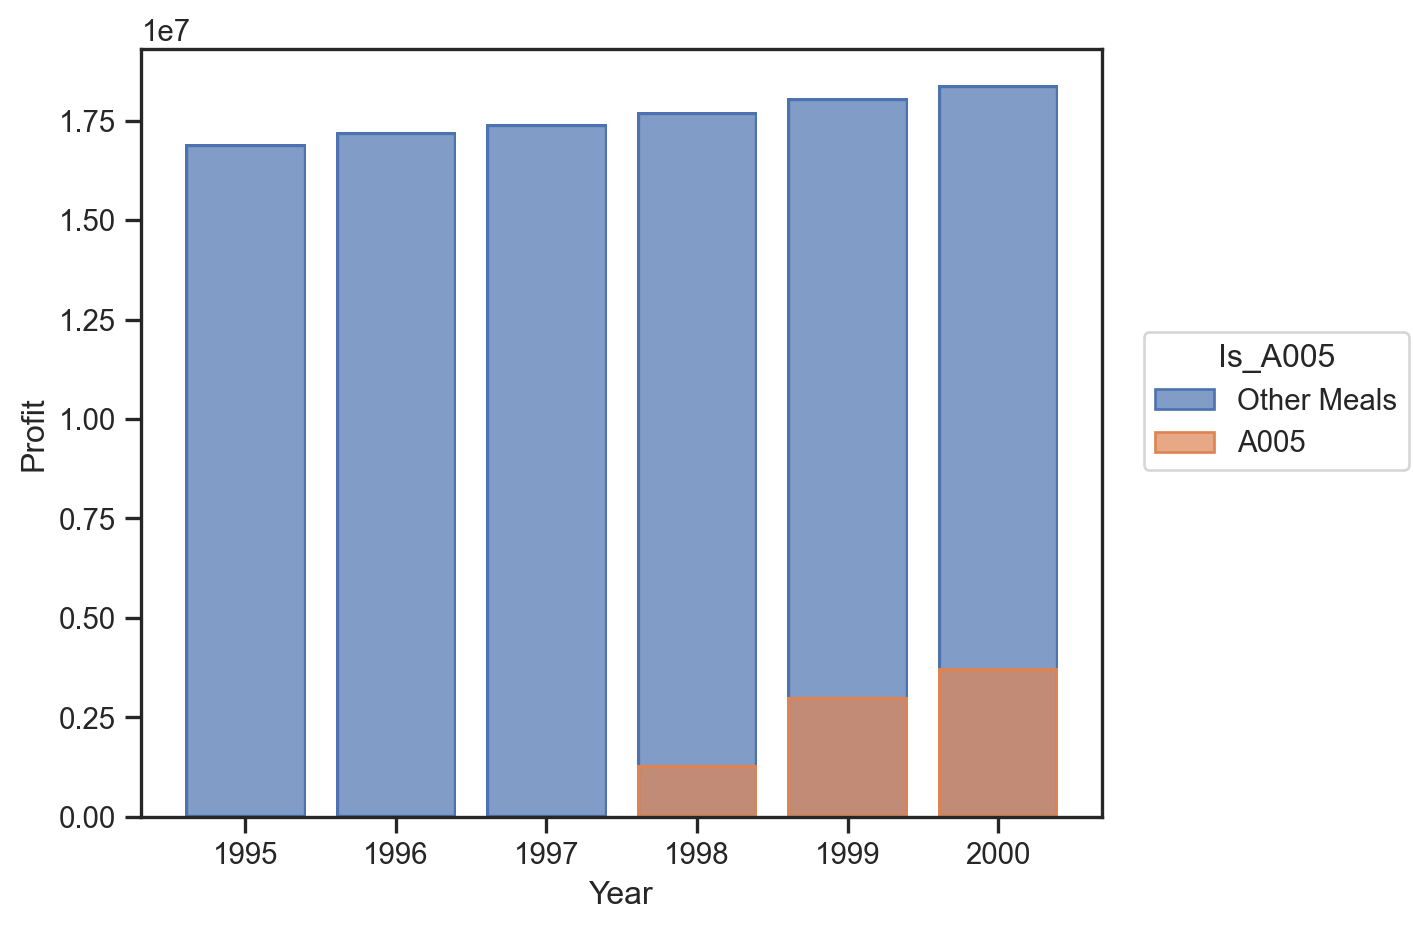

In [132]:
# Create a new column 'Is_A005' to mark whether the sale is from A005 or not
merge_cost_POS['Is_A005'] = merge_cost_POS['Meal'] == 'A005'
merge_cost_POS['Is_A005'] = merge_cost_POS['Is_A005'].replace({True: 'A005', False: 'Other Meals'})

# Group data by year, restaurant and whether the sale is from A005 or not
grouped_data = merge_cost_POS.groupby(['Year', 'Restaurant', 'Is_A005']).agg({'Profit': 'sum'}).reset_index()
#print(grouped_data)

from seaborn import axes_style

(so.Plot(data=grouped_data, x='Year', y='Profit', color='Is_A005')
    .add(so.Bar(), so.Agg())
    .layout(size=(6, 5))
    .theme(axes_style("ticks"))
)



Is_A005        A005  Other Meals
Year                            
1995            NaN  169035601.0
1996            NaN  172156651.0
1997            NaN  174175355.0
1998     13141092.0  177271121.0
1999     30144068.0  180620422.0
2000     37319990.0  183838610.0


<Axes: xlabel='Year'>

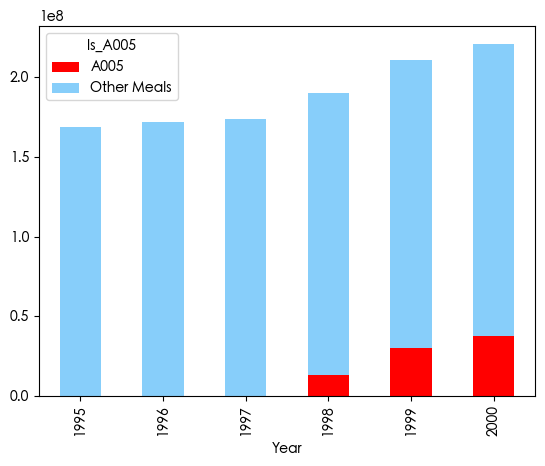

In [90]:
# Create a new column 'Is_A005' to mark whether the sale is from A005 or not
merge_cost_POS['Is_A005'] = merge_cost_POS['Meal'] == 'A005'
merge_cost_POS['Is_A005'] = merge_cost_POS['Is_A005'].replace({True: 'A005', False: 'Other Meals'})

# Group data by year, restaurant and whether the sale is from A005 or not
grouped_data = merge_cost_POS.groupby(['Year','Is_A005']).agg({'Profit': 'sum'}).reset_index()
#print(grouped_data)

# Pivot the data to create a stacked bar chart
pivoted_data = grouped_data.pivot_table(index=['Year'], columns='Is_A005', values='Profit', aggfunc='sum')
print(pivoted_data)

pivoted_data.plot(kind='bar', stacked=True, color=['red', 'lightskyblue'])

/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seabo

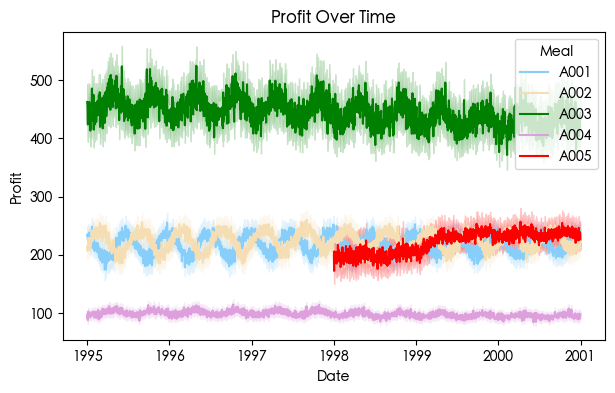

In [14]:
plt.figure(figsize=(7, 4))
sns.lineplot(data=merge_cost_POS, x='Date', y='Profit', hue='Meal', palette=['lightskyblue', 'wheat', 'green', 'plum', 'red'])
plt.title('Profit Over Time')
plt.show()

In [11]:
merge_cost_POS.head()

,Order_ID,Date,Meal,Units,Restaurant,Sales,Year,Month,菜名,Cost,Total_Cost,Profit
0,199501010000000001,1995-01-01,A001,4,1,346.0,1995,1,鴨肉麵線湯,40,160,186.0
684434,199902210000000033,1999-02-21,A001,1,9,72.0,1999,2,鴨肉麵線湯,40,40,32.0
684435,199902210000000032,1999-02-21,A001,2,9,144.0,1999,2,鴨肉麵線湯,40,80,64.0
684436,199902210000000031,1999-02-21,A001,4,9,259.0,1999,2,鴨肉麵線湯,40,160,99.0
684437,199902210000000044,1999-02-21,A001,4,10,216.0,1999,2,鴨肉麵線湯,40,160,56.0


/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seabo

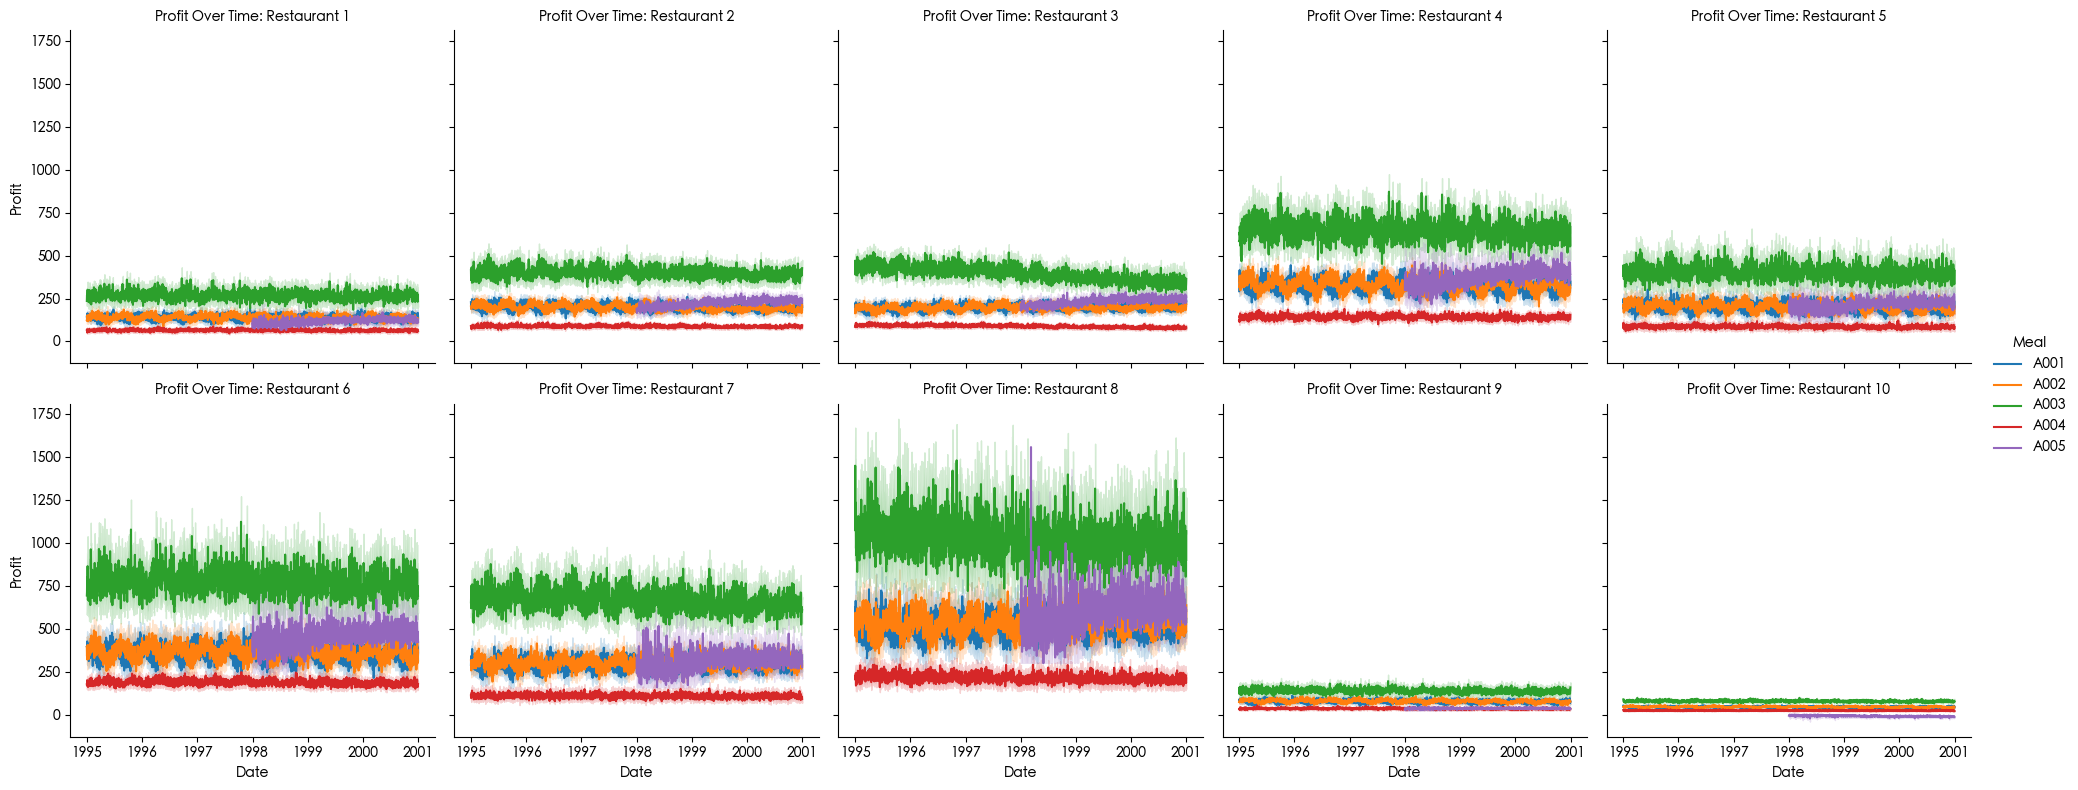

In [12]:
merge_cost_POS = merge_cost_POS.sort_values(by='Meal')

g = sns.FacetGrid(merge_cost_POS, col='Restaurant', hue='Meal', height=4, col_wrap=5)
g.map_dataframe(sns.lineplot, x='Date', y='Profit')
g.set_titles("Profit Over Time: Restaurant {col_name}")
g.add_legend(title='Meal')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seabo

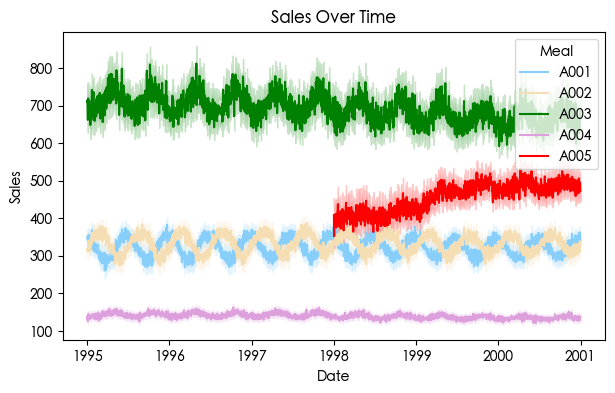

In [13]:
plt.figure(figsize=(7, 4))
sns.lineplot(data=merge_cost_POS, x='Date', y='Sales', hue='Meal', palette=['lightskyblue', 'wheat', 'green', 'plum', 'red'])
plt.title('Sales Over Time')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seabo

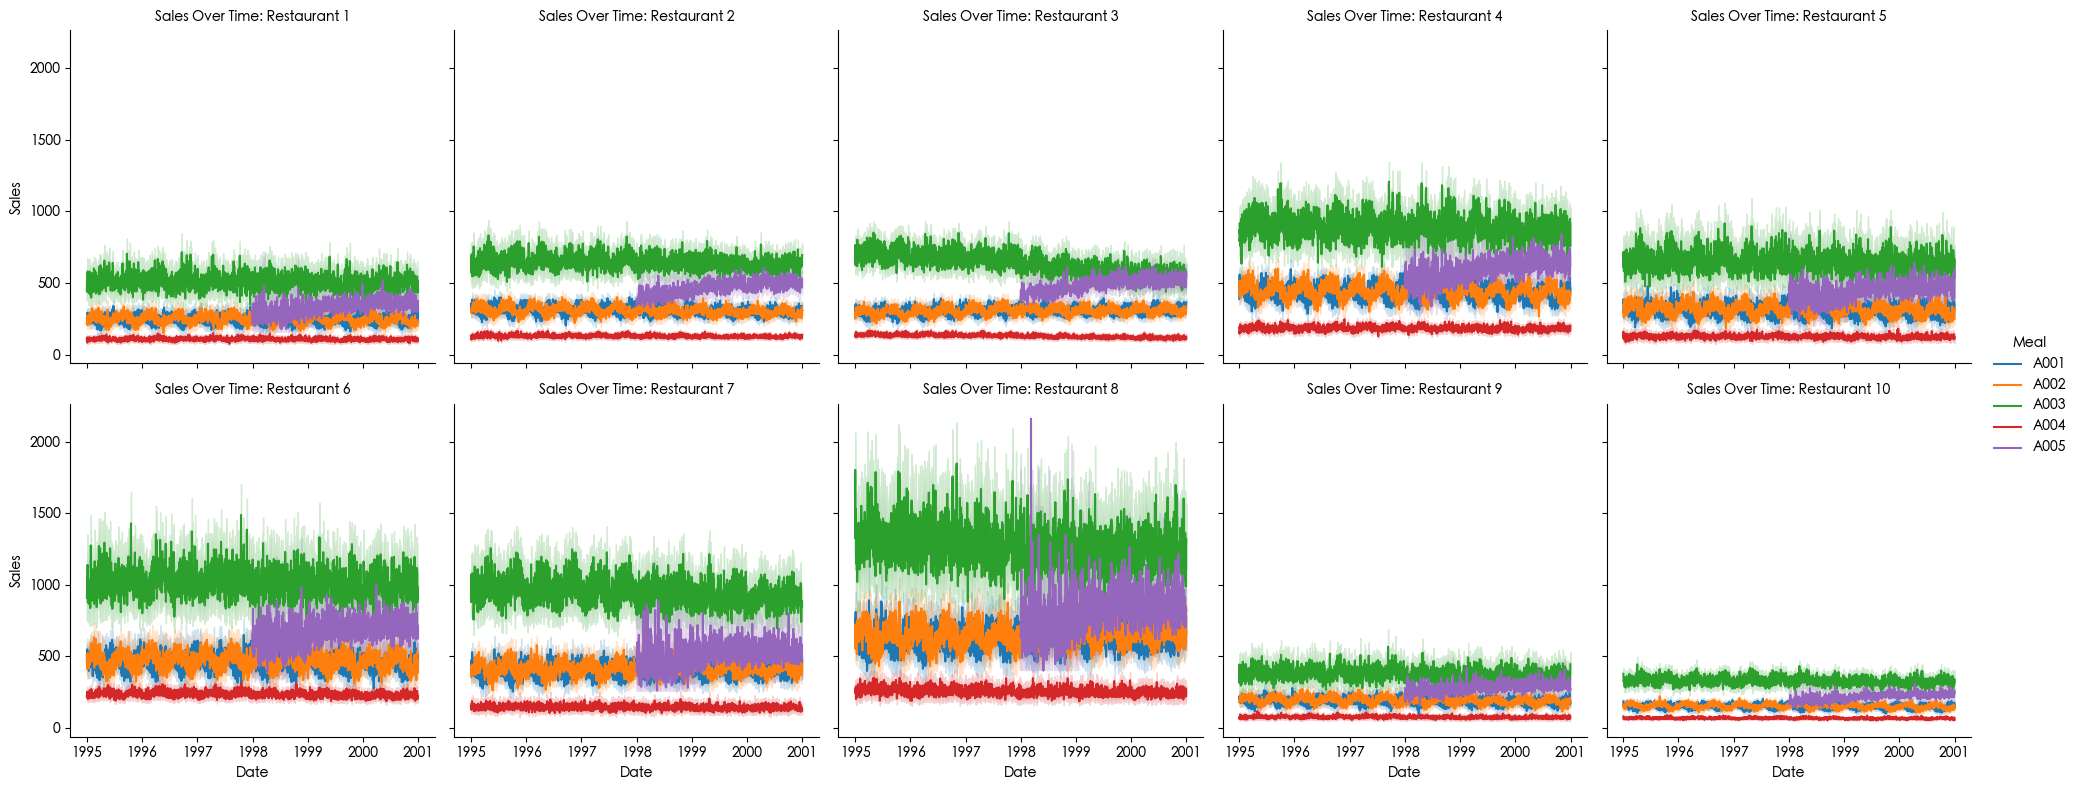

In [8]:
merge_cost_POS = merge_cost_POS.sort_values(by='Meal')

g = sns.FacetGrid(merge_cost_POS, col='Restaurant', hue='Meal', height=4, col_wrap=5)
g.map_dataframe(sns.lineplot, x='Date', y='Sales')
g.set_titles("Sales Over Time: Restaurant {col_name}")
g.add_legend(title='Meal')
plt.show()

### 分店10似乎新品獲利極差？

/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/default_env_jupy/lib/python3.11/site-packages/seabo

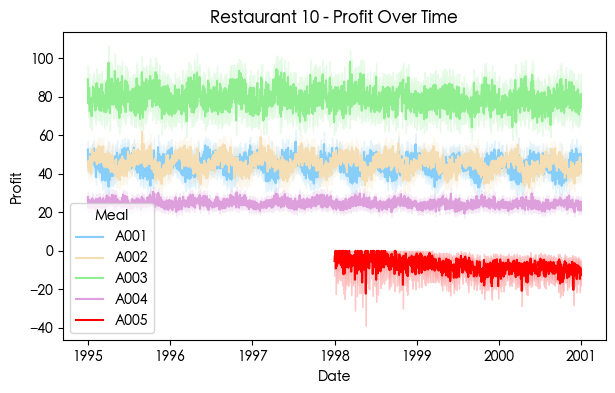

In [32]:
plt.figure(figsize=(7, 4))
sns.lineplot(data=merge_cost_POS.loc[merge_cost_POS['Restaurant'] == 10], x='Date', y='Profit', hue='Meal', palette=['lightskyblue', 'wheat', 'lightgreen', 'plum', 'red'])
plt.title('Restaurant 10 - Profit Over Time')
plt.show()